In [70]:
# PART 1

import pandas as pd
import numpy as np
data = pd.read_csv('project1.csv')

In [2]:
data

,class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no
...,...,...,...,...,...,...,...,...,...,...
381,no-recurrence-events,40-49,premeno,30-34,3-5,no,3,right,left_low,no
382,no-recurrence-events,60-69,ge40,30-34,3-5,yes,2,right,left_up,yes
383,no-recurrence-events,70-79,premeno,20-24,0-2,no,3,right,right_up,no
384,no-recurrence-events,70-79,premeno,30-34,9-11,no,1,right,left_low,yes


In [3]:
# Part 1 (6 points): Your objective is to perform Exploratory data analysis on the dataset. Complete the following:

In [4]:
# Identify shape, size of the raw data (1 point)
data.shape

(386, 10)

In [5]:
data.size

3860

In [6]:
# Get information about datatypes. Comment if any of the variables need datatype conversion. 
# Check for duplicate rows and treat them. (1 point)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386 entries, 0 to 385
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   class        386 non-null    object
 1   age          386 non-null    object
 2   menopause    386 non-null    object
 3   tumor-size   385 non-null    object
 4   inv-nodes    385 non-null    object
 5   node-caps    386 non-null    object
 6   deg-malig    386 non-null    int64 
 7   breast       386 non-null    object
 8   breast-quad  386 non-null    object
 9   irradiat     386 non-null    object
dtypes: int64(1), object(9)
memory usage: 30.3+ KB


In [7]:
data['class'].unique() # this is dependent variable, convert to numerical

array(['recurrence-events', 'no-recurrence-events'], dtype=object)

In [8]:
data['age'].unique() # convert to one-hot encoding

array(['30-39', '40-49', '60-69', '50-59', '70-79', '20-29'], dtype=object)

In [9]:
data['menopause'].unique() # convert to one-hot encoding

array(['premeno', 'ge40', 'lt40'], dtype=object)

In [10]:
data['tumor-size'].unique() # clean Nan entries convert to one-hot encoding

array(['30-34', '20-24', '15-19', '0-4', '25-29', '50-54', '10-14',
       '40-44', '35-39', '5-9', '45-49', nan], dtype=object)

In [11]:
data['inv-nodes'].unique() # clean NaN entries, convert to one-hot encoding

array(['0-2', '6-8', '9-11', '3-5', '15-17', '12-14', nan, '24-26'],
      dtype=object)

In [12]:
data['node-caps'].unique() # clean data for this column and convert to categorical

array(['no', '*', 'yes', '?'], dtype=object)

In [13]:
data['deg-malig'].unique() # keep as int-type

array([3, 2, 1])

In [14]:
data['breast'].unique() # convert to categorical

array(['left', 'right'], dtype=object)

In [15]:
data['breast-quad'].unique() # clean data for this column and convert to one-hot encoding

array(['left_low', 'right_up', 'left_up', 'right_low', '?', 'central',
       '*'], dtype=object)

In [16]:
data['irradiat'].unique() # convert to categorical

array(['no', 'yes'], dtype=object)

In [17]:
data.duplicated().sum() # found 11 duplicated rows

11

In [18]:
data.drop_duplicates(inplace=True, ignore_index=True)
data.duplicated().sum() # duplicates is now 0

0

In [19]:
# Identify missing data and/or invalid values and treat them with suitable mean, median, mode or other method (1 point)

In [20]:
data.isnull().sum() # there is one none null element in the tumor-size column, and one in the inv-nodes column 
                    # but now the qeustion is if i should use univariate or multivariate imputation
                    # lets use univariate

class          0
age            0
menopause      0
tumor-size     1
inv-nodes      1
node-caps      0
deg-malig      0
breast         0
breast-quad    0
irradiat       0
dtype: int64

In [21]:
data[data['tumor-size'].isna()]

,class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
165,no-recurrence-events,50-59,premeno,NaN,0-2,no,2,right,left_up,no


In [22]:
data['tumor-size'] = data['tumor-size'].transform(lambda x: x.fillna(x.mode()[0])) # mode-based univariate imputation

In [23]:
data.iloc[165,] # check if entry was changed

class          no-recurrence-events
age                           50-59
menopause                   premeno
tumor-size                    30-34
inv-nodes                       0-2
node-caps                        no
deg-malig                         2
breast                        right
breast-quad                 left_up
irradiat                         no
Name: 165, dtype: object

In [24]:
data[data['inv-nodes'].isna()]

,class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
254,recurrence-events,40-49,ge40,25-29,NaN,yes,3,left,right_low,yes


In [25]:
data['inv-nodes'] = data['inv-nodes'].transform(lambda x: x.fillna(x.mode()[0])) # mode-based univariate imputation

In [26]:
data.iloc[254,] # check if entry was changed

class          recurrence-events
age                        40-49
menopause                   ge40
tumor-size                 25-29
inv-nodes                    0-2
node-caps                    yes
deg-malig                      3
breast                      left
breast-quad            right_low
irradiat                     yes
Name: 254, dtype: object

In [27]:
data.isnull().sum() # double check missing data and invalid values are treated

class          0
age            0
menopause      0
tumor-size     0
inv-nodes      0
node-caps      0
deg-malig      0
breast         0
breast-quad    0
irradiat       0
dtype: int64

In [28]:
# So NaN data has been cleaned, but there are still invalid entires (*, ?) for node-caps and breast-quad columns
# Let's clean that now
((data['node-caps'] == '*') | (data['node-caps'] == '?')).sum()

12

In [29]:
data['node-caps'] = data['node-caps'].replace(['*', '?'], data['node-caps'].mode()[0])  # mode-based univariate imputation

In [30]:
((data['node-caps'] == '*') | (data['node-caps'] == '?')).sum() # double check

0

In [31]:
((data['breast-quad'] == '*') | (data['breast-quad'] == '?')).sum()

6

In [32]:
data['breast-quad'] = data['breast-quad'].replace(['*', '?'], data['breast-quad'].mode()[0])  # mode-based univariate imputation

In [33]:
((data['breast-quad'] == '*') | (data['breast-quad'] == '?')).sum() # double check

0

In [34]:
# Visualize the dataset through different univariate analysis and comment on your observations (2)

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   class        375 non-null    object
 1   age          375 non-null    object
 2   menopause    375 non-null    object
 3   tumor-size   375 non-null    object
 4   inv-nodes    375 non-null    object
 5   node-caps    375 non-null    object
 6   deg-malig    375 non-null    int64 
 7   breast       375 non-null    object
 8   breast-quad  375 non-null    object
 9   irradiat     375 non-null    object
dtypes: int64(1), object(9)
memory usage: 29.4+ KB


In [37]:
# Convert datatypes from obj to categorical
data['age'] = data['age'].astype("category") # turn to one-hot encoding later
data['menopause'] = data['menopause'].astype("category") # turn to one-hot encoding later
data['tumor-size'] = data['tumor-size'].astype("category") # turn to one-hot encoding later
data['inv-nodes'] = data['inv-nodes'].astype("category") # turn to one-hot encoding later
data['node-caps'] = data['node-caps'].astype("category") 
data['breast'] = data['breast'].astype("category") 
data['breast-quad'] = data['breast-quad'].astype("category") # turn to one-hot encoding later
data['irradiat'] = data['irradiat'].astype("category") 

<Axes: xlabel='age', ylabel='Count'>

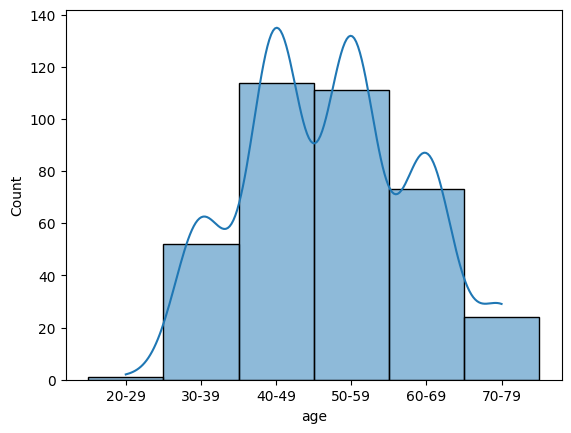

In [38]:
sns.histplot(data=data['age'], bins=5, kde=True)

<function matplotlib.pyplot.show(close=None, block=None)>

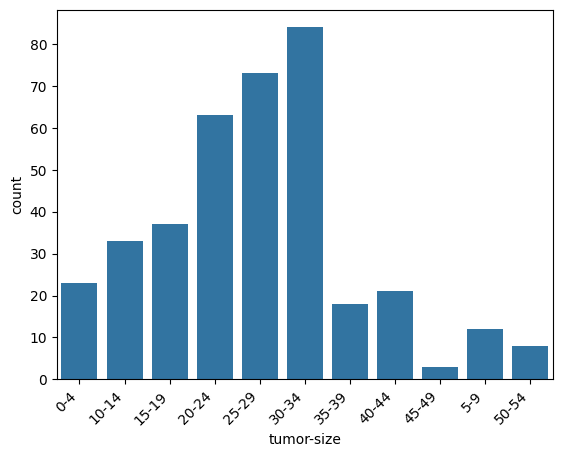

In [39]:
sns.countplot(x=data['tumor-size'])
plt.xticks(rotation=45, ha='right')
plt.show

<Axes: xlabel='menopause', ylabel='Count'>

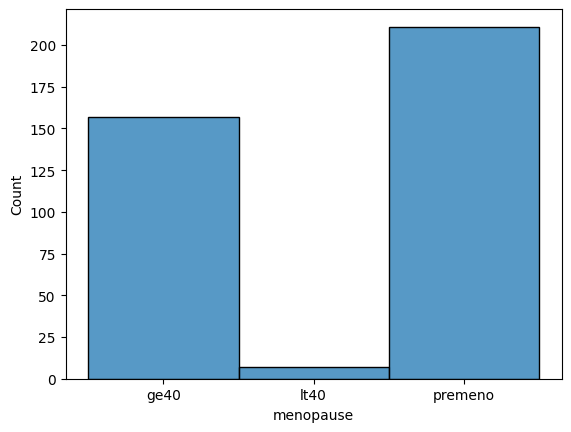

In [40]:
sns.histplot(data=data['menopause'])

<Axes: xlabel='inv-nodes'>

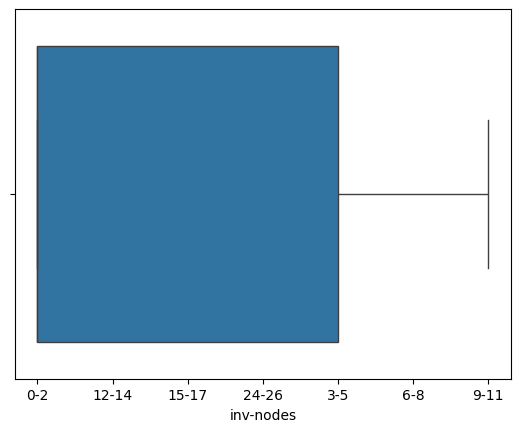

In [41]:
#sns.histplot(data=data['inv-nodes'])
sns.boxplot(data=data, x='inv-nodes')

<Axes: xlabel='node-caps', ylabel='Count'>

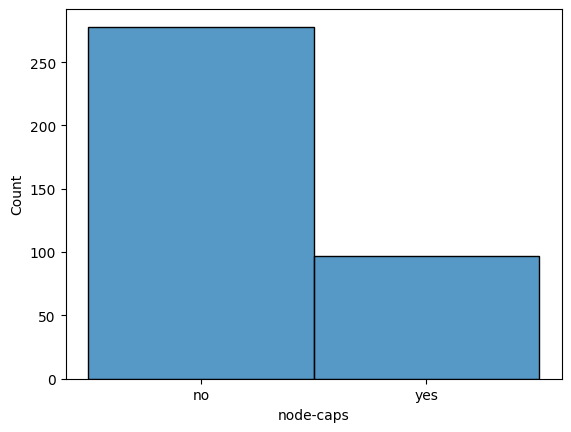

In [42]:
sns.histplot(data=data['node-caps'])

<Axes: xlabel='breast', ylabel='Count'>

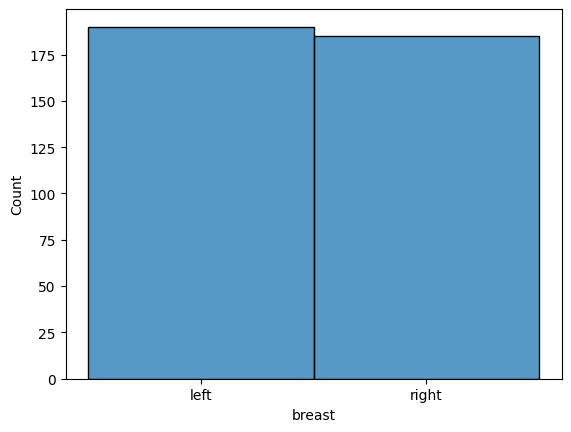

In [43]:
sns.histplot(data=data['breast'])

<Axes: xlabel='breast-quad', ylabel='Count'>

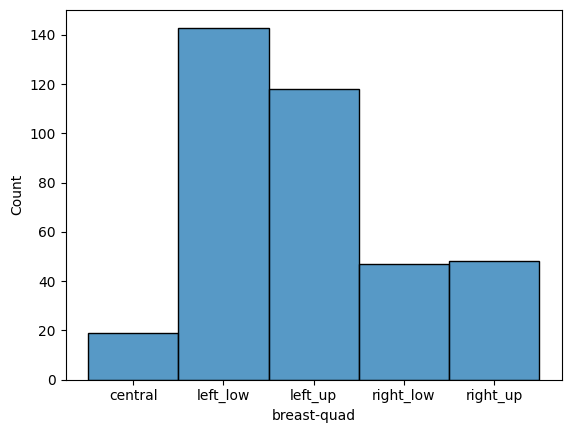

In [44]:
sns.histplot(data=data['breast-quad'])

<Axes: xlabel='irradiat', ylabel='Count'>

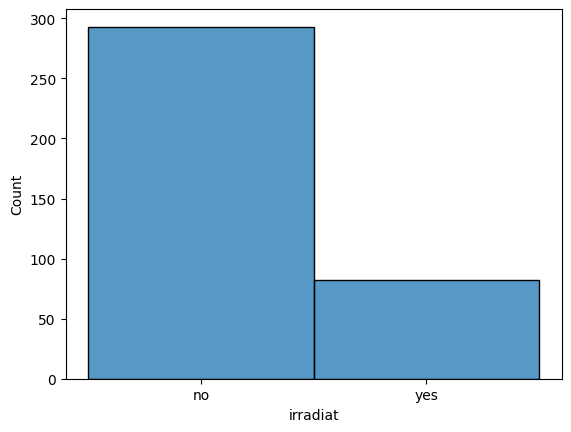

In [45]:
sns.histplot(data=data['irradiat'])

In [ ]:
# Observations:
    # Plot for tumor size is skewed right - i.e. some outliers
    # Less than 1/3 of the individuals in data have node-caps

In [46]:
# Perform one-hot encoding on categorical variables (1 point) ~ NOTE: one-hot encoding applies to NONORDINAL CATEGORICALS

In [47]:
# change class to int type so that SGDClassifier works
data = pd.get_dummies(data, columns=["age"], drop_first=True)
data = pd.get_dummies(data, columns=["menopause"], drop_first=True)
data = pd.get_dummies(data, columns=["tumor-size"], drop_first=True)
data = pd.get_dummies(data, columns=["inv-nodes"], drop_first=True)
data = pd.get_dummies(data, columns=["breast-quad"], drop_first=True)

# below are one hot encoded for columns that were binary categorical
data = pd.get_dummies(data, columns=["class"], drop_first=True)
data = pd.get_dummies(data, columns=["node-caps"], drop_first=True)
data = pd.get_dummies(data, columns=["breast"], drop_first=True)
data = pd.get_dummies(data, columns=["irradiat"], drop_first=True)

In [48]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   deg-malig                375 non-null    int64
 1   age_30-39                375 non-null    bool 
 2   age_40-49                375 non-null    bool 
 3   age_50-59                375 non-null    bool 
 4   age_60-69                375 non-null    bool 
 5   age_70-79                375 non-null    bool 
 6   menopause_lt40           375 non-null    bool 
 7   menopause_premeno        375 non-null    bool 
 8   tumor-size_10-14         375 non-null    bool 
 9   tumor-size_15-19         375 non-null    bool 
 10  tumor-size_20-24         375 non-null    bool 
 11  tumor-size_25-29         375 non-null    bool 
 12  tumor-size_30-34         375 non-null    bool 
 13  tumor-size_35-39         375 non-null    bool 
 14  tumor-size_40-44         375 non-null    bool 
 15  tumor-

In [49]:
# PART 2

In [50]:
# Split the data into training and test datasets.
# Make sure your split is reproducible and that it maintains roughly the proportion of each class of dependent variable. (1 point)

In [61]:
from sklearn.model_selection import train_test_split
x = data.drop('class_recurrence-events',axis=1) # remove class column
y = data['class_recurrence-events']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, stratify=y, random_state=1)

In [62]:
# Perform classification using (6 points)

In [63]:
# K-Nearest Neighbor Classifier

In [64]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [65]:
# K-Nearest Neighbor Classifier using Grid search CV

In [82]:
from sklearn.model_selection import GridSearchCV
knn_search_recall = KNeighborsClassifier()
param_grid = {"n_neighbors": np.arange(1, 20)}
knn_gscv = GridSearchCV(knn_search_recall, param_grid, cv=5, scoring='recall')
knn_gscv.fit(x_train, y_train)
knn_gscv.best_params_ # prints n = 1
best_recall = knn_gscv.best_estimator_

In [62]:
# Linear classification

In [53]:
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier(loss="perceptron", alpha=0.01)
clf.fit(x_train, y_train)

SGDClassifier(alpha=0.01, loss='perceptron')

In [81]:
# Print report showing accuracy, recall, precision and f1-score for each classification model. 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
models = [knn, best_recall, clf]
for m in models:
    print(m)
    # print accuracy
    accuracy_test=accuracy_score(y_test, m.predict(x_test))
    print('Accuracy on test data is : {:.2}'.format(accuracy_test))
    accuracy_train=accuracy_score(y_train, m.predict(x_train))
    print('Accuracy on train data is : {:.2}'.format(accuracy_train))
    
    # print precision
    precision_test = precision_score(y_test, m.predict(x_test))
    print('Precision on test data is : {:.2}'.format(precision_test))
    precision_train = precision_score(y_train, m.predict(x_train))
    print('Precision on train data is : {:.2}'.format(precision_train))
    
    # print recall
    recall_test = recall_score(y_test, m.predict(x_test))
    print('Recall on test data is : {:.2}'.format(recall_test))
    recall_train = recall_score(y_train, m.predict(x_train))
    print('Recall on train data is : {:.2}'.format(recall_train))
    
    
    # print f1-score
    f1_test = f1_score(y_test, m.predict(x_test))
    print('F1-score on test data is : {:.2}'.format(f1_test))
    f1_train = f1_score(y_train, m.predict(x_train))
    print('F1-score on train data is : {:.2}'.format(f1_train))
    print()

KNeighborsClassifier(n_neighbors=3)
Accuracy on test data is : 0.6
Accuracy on train data is : 0.77
Precision on test data is : 0.35
Precision on train data is : 0.7
Recall on test data is : 0.31
Recall on train data is : 0.53
F1-score on test data is : 0.33
F1-score on train data is : 0.6

KNeighborsClassifier(n_neighbors=1)
Accuracy on test data is : 0.58
Accuracy on train data is : 0.98
Precision on test data is : 0.34
Precision on train data is : 0.97
Recall on test data is : 0.36
Recall on train data is : 0.99
F1-score on test data is : 0.35
F1-score on train data is : 0.98

SGDClassifier(alpha=0.01, loss='perceptron')
Accuracy on test data is : 0.41
Accuracy on train data is : 0.55
Precision on test data is : 0.32
Precision on train data is : 0.41
Recall on test data is : 0.75
Recall on train data is : 0.84
F1-score on test data is : 0.45
F1-score on train data is : 0.55



In [ ]:
# Which metric is most important for this problem? (You will explain your answer in the report in Part 3). ( 2 points)
    # ans: Recall is most important because we want to avoid false negatives 
    # (i.e. the model states that a woman does not have breast cancer when she actually has it))